Given an input image, using Python code, you have to compute all those region
properties, which have been computed using Matlab code in lecture slides, e.g., area,
centroid, perimeter and circularity. You must implement this using Python code from
scratch without using any built-in library for computing these parameters.

In [174]:
import numpy as np
import math

# Function to calculate area of a region
def calculate_area(image):
    area = np.sum(image)
    return area

# Function to calculate centroid of a region
def calculate_centroid(image):
    indices = np.where(image == 1)
    centroid_x = np.mean(indices[1])
    centroid_y = np.mean(indices[0])
    return centroid_x, centroid_y

# Function to calculate perimeter of a region
def calculate_perimeter(image):
    rows, cols = image.shape
    perimeter = 0
    for i in range(rows):
        for j in range(cols):
            if image[i, j] == 1:
                if i == 0 or j == 0 or i == rows - 1 or j == cols - 1:
                    perimeter += 1
                else:
                    if image[i - 1, j] == 0 or image[i + 1, j] == 0 or image[i, j - 1] == 0 or image[i, j + 1] == 0:
                        perimeter += 1
    return perimeter

# Function to calculate circularity of a region
def calculate_circularity(area, perimeter):
    circularity = 0
    if perimeter != 0:
        circularity = (4 * math.pi * area) / (perimeter ** 2)
    return circularity

# Example usage:
image = np.array([
    [1, 1, 1, 0],
    [1, 0, 0, 1],
    [0, 1, 1, 1],
])

area = calculate_area(image)
centroid = calculate_centroid(image)
perimeter = calculate_perimeter(image)
circularity = calculate_circularity(area, perimeter)

print(f"Area: {area}")
print(f"Centroid: {centroid}")
print(f"Perimeter: {perimeter}")
print(f"Circularity: {circularity}")


Area: 8
Centroid: (1.5, 1.0)
Perimeter: 8
Circularity: 1.5707963267948966


After this, given an image containing 3 fruits mango, apple and banana (see Image 1 –
Assign 2.png). Write a program which identifies each fruit type and marks the boundary
of each fruit along with its label. You should use different region properties to identify the
fruit type, e.g., assume mango is larger in size compared to apple.

In [178]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('D:\\Semester 7\\Computer_Vision\\Assignment 02\\Image 1 - Assign 2.png')

Apply thresholding and find the contours

In [179]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

apply thresholding base on assumptions

In [180]:

#  (e.g., mango > apple)
threshold_mango = 1000  
threshold_apple = 500   

fruit_types = {
    'mango': [],
    'apple': [],
    'banana': []
}

# Iterate through contours
for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)

    # Skip contours with small perimeter or area
    if perimeter == 0 or area == 0:
        continue

    circularity = 4 * np.pi * area / (perimeter * perimeter)

    # Classify fruit based on assumptions
    if area > threshold_mango:
        fruit_types['mango'].append(contour)
    elif area > threshold_apple:
        fruit_types['apple'].append(contour)
    else:
        fruit_types['banana'].append(contour)

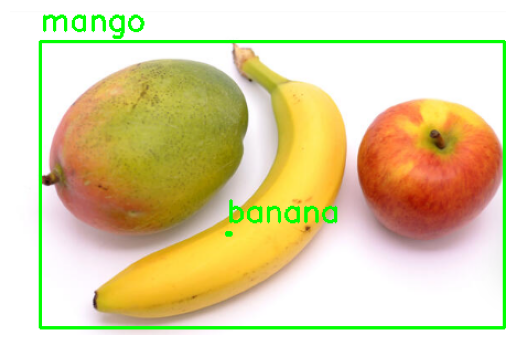

In [181]:

# Draw bounding boxes and label fruits
output_image = image.copy()
for fruit, contours in fruit_types.items():
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(output_image, fruit, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        break  # Only label once per fruit type

# Convert image to RGB for displaying with matplotlib
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Display the result using matplotlib
plt.imshow(output_image_rgb)
plt.axis('off')  # Hide the axis
plt.show()



Consider Image 2 – Assign 2.png. Write python code to identify and mark the 2 types of
fruit in the same way as in Part b. However, note that you may need to remove the

background objects, (e.g., plate, shadow) using image processing operations such as
morphological operations.

In [182]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:

image = cv2.imread('D:\\Semester 7\\Computer_Vision\\Assignment 02\\Image 2 - Assing 2.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# Threshold the image to get the fruits
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((15,15),np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

In [ ]:
# Find contours in the image
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours based on area
min_contour_area = 500  # Adjust this value based on your image
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

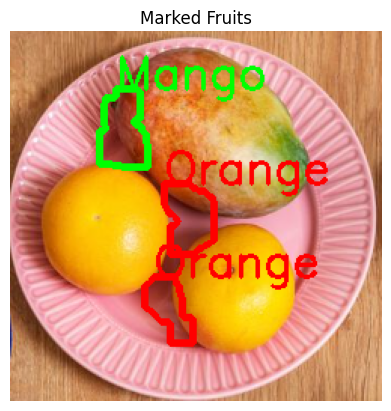

In [172]:

# Assuming the larger fruit is of type 1 and smaller is of type 2
contours.sort(key=cv2.contourArea)
type1_contour = contours[-1]
type2_contour = contours[:-1]

# Draw the contours on the image
cv2.drawContours(image, [type1_contour], -1, (0, 255, 0), 3)  # Draw type 1 fruit in green
cv2.putText(image, 'Mango', tuple(type1_contour[0][0]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

for contour in type2_contour:
    cv2.drawContours(image, [contour], -1, (0, 0, 255), 3)  # Draw type 2 fruit in red
    cv2.putText(image, 'Orange', tuple(contour[0][0]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Convert the result to RGB for displaying
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image and the result
plt.imshow(image_rgb)
plt.title('Marked Fruits')
plt.axis('off')
plt.show()